In [2]:
import seaborn
from matplotlib import pyplot as plt
import statistics as st
import random
import math
%matplotlib inline

In [3]:
def flipper():
    return random.choice([0,1])

In [12]:
def sim(coin, num):
    k = int(math.log2(num))
    if 2**k == num:
        return {m:[coin() for _ in range(m)] for m in
                [2**(n+1)-2**n for n in range(k+1)]}
        
    nums = {m:[coin() for _ in range(m)] for m in 
            [2**(n+1) - 2**n for n in range(k+1)]}
    nums[num] = [coin() for _ in range(num - 2**k)]
    return nums

In [13]:
current_data = sim(flipper, 20)
def plotter_diff(data):
    nums = sorted([item for item in data.keys()])
    diff = [2*sum(data[item])-len(data[item]) for item in nums]
    return nums, diff

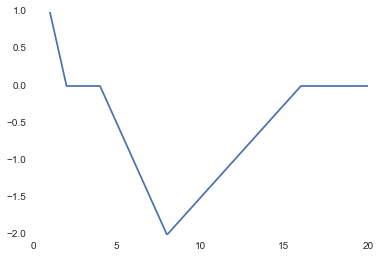

In [14]:
plt.plot(*plotter_diff(current_data))

In [15]:
def rat(items):
    if sum(items) != len(items):
        return sum(items)/(len(items) - sum(items))
    else:
        return 0

def plotter_ratio(data):
    nums = sorted([item for item in data.keys()])
    ratio = [rat(data[item]) for item in nums]
    
    return nums, ratio

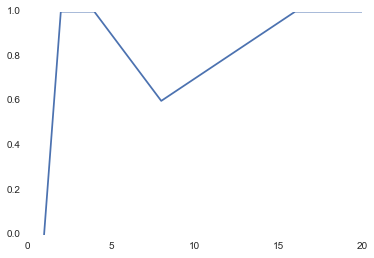

In [16]:
plt.plot(*plotter_ratio(current_data))

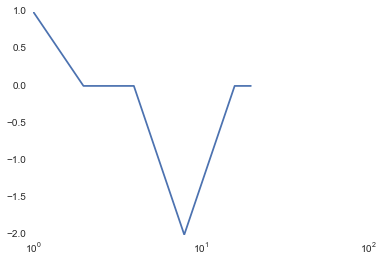

In [17]:
plt.xscale('log')
plt.plot(*plotter_diff(current_data))

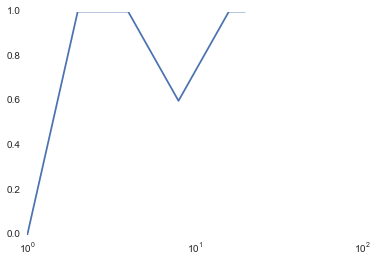

In [18]:
plt.xscale('log')
plt.plot(*plotter_ratio(current_data))

In [29]:
data_list = [sim(flipper, 2**16) for _ in range(20)]

In [11]:
def average(items):
    return sum(items)/len(items)

def ratios(data_list):
    new_list = []
    nums = sorted([item for item in data_list[0].keys()])
    for data in data_list:
        new_list.append([rat(data[item])
                         for item in nums])
    
    return nums, new_list
    
def scatter_ratio(data_list):
    nums, data_list = ratios(data_list)
    
    vals = [[values[idx] for values in data_list]
            for idx in range(len(nums))]
        
    new_list = [average(item) for item in vals]
    
    return plt.scatter(nums, new_list)

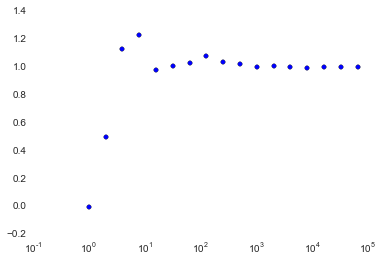

In [30]:
plt.xscale('log')
scatter_ratio(data_list)

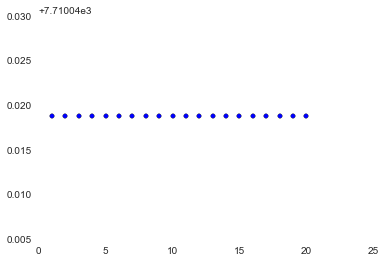

In [31]:
plt.scatter(range(1,len(data_list)+1), [st.mean(item) for
                                        item in data_list])

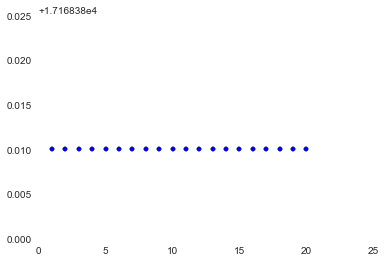

In [32]:
plt.scatter(range(1,len(data_list)+1), [st.stdev(item) for 
                                      item in data_list])

In [4]:
def simple_sim(coin, num):
    return sum([random.choice([0,1]) for _ in range(num)])

In [5]:
data_list = [simple_sim(flipper, 100)/100 for _ in range(100000)]

(array([    53.,    587.,   4069.,  14845.,  29198.,  29629.,  16326.,
          4559.,    679.,     55.]),
 array([ 0.434 ,  0.4471,  0.4602,  0.4733,  0.4864,  0.4995,  0.5126,
         0.5257,  0.5388,  0.5519,  0.565 ]),
 <a list of 10 Patch objects>)

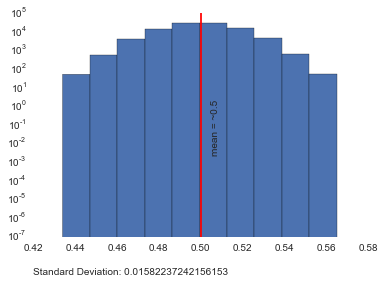

In [33]:
plt.yscale('log')
plt.axvline(st.mean(data_list), color='red')
plt.text(0.505, 1, "mean = ~0.5", rotation=90)
sd = st.stdev(data_list)
plt.text(.42, 10**-9, "Standard Deviation: {}".format(sd))
plt.hist(data_list, bins = 10)

{'boxes': [<matplotlib.lines.Line2D at 0x108e24e48>],
 'caps': [<matplotlib.lines.Line2D at 0x10843d748>,
 'fliers': [<matplotlib.lines.Line2D at 0x10844cf28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10844c748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1084526d8>,
  <matplotlib.lines.Line2D at 0x108452f28>]}

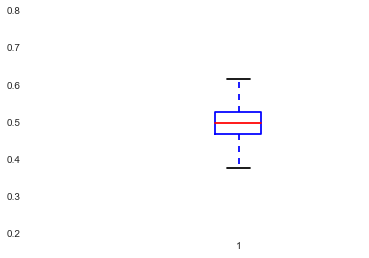

In [7]:
plt.xscale('log')
plt.boxplot(data_list)

In [8]:
data_list = [simple_sim(flipper, 1000)/1000 for _ in range(100000)]

(array([    53.,    587.,   4069.,  14845.,  29198.,  29629.,  16326.,
          4559.,    679.,     55.]),
 array([ 0.434 ,  0.4471,  0.4602,  0.4733,  0.4864,  0.4995,  0.5126,
         0.5257,  0.5388,  0.5519,  0.565 ]),
 <a list of 10 Patch objects>)

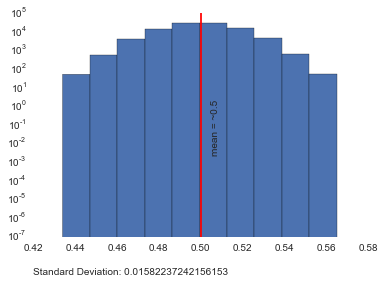

In [32]:
plt.yscale('log')
plt.axvline(st.mean(data_list), color='red')
plt.text(0.505, 1, "mean = ~0.5", rotation=90)
sd = st.stdev(data_list)
plt.text(.42, 10**-9, "Standard Deviation: {}".format(sd))
plt.hist(data_list, bins = 10)

{'boxes': [<matplotlib.lines.Line2D at 0x10440dcf8>],
 'caps': [<matplotlib.lines.Line2D at 0x109c3bda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x109c615c0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x109c2eda0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x109c35d30>,
  <matplotlib.lines.Line2D at 0x109c3b5c0>]}

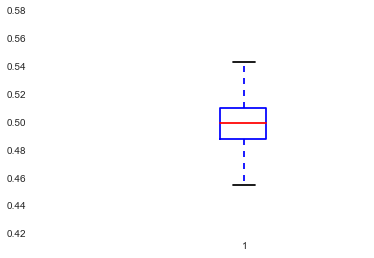

In [11]:
plt.xscale('log')
plt.boxplot(data_list)

In [ ]:
"""
Lesson of the day:
More data = Better
"""